## Linear Regression 

*What is linear regression?*

Regression is a method to determine the linear relationship between two variables by determining the best fit line between them.  Using this, we are trying to come up with a model or predictive relationship.


Remember that the equation for a line is:

$y=mx+b$

m=slope (sometimes called the regression coefficient)

b=y-intercept

y=predictand/dependent variable

x=predictor/independent variable


Linear regression is used to determine the *b* and *m* that defines this best fit line. 

In [94]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

#### Let's start with an idealized example first

In [95]:
x = np.random.normal(5.0,1.0,200) # (mean, std. deviation, N)
m = 3
b = 60
noise=np.random.normal(5,1.0,200)
y = m * x + b + noise

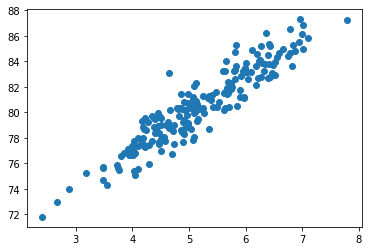

In [96]:
plt.scatter(x,y)

Typicallly, what we have are two timeseries, x and y and we do not know what *m* and *b* are. 

We use linear regression to determine the *m* and *b* that best fit a line between the two datasets

Let's pretend we have *x* and *y* and we don't know what *m* and *b* are.

### Determine slope and y-intercept using `np.polyfit`

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

`np.polyfit` takes *x* and *y* as input. It also takes as its 3rd argument, the degree of the fit.  For a linear regression problem, the degree is 1.




This function is more powerful than just linear regression. It can fit our data to different polynomials.  

$p(x) = p_0*x^1 + p_1*x^2 + p_2*x^3 + p_n*x^n$


It returns the vector *p* in reverse order, so 
the highest degree power is first. 

Here, we will use it only for fitting a line, so in our case, we have:

$p(x) = p[1]*x^0 + p[0]*x^1$, where

`m=p[0]` (y-intercept)

`b=p[1]` (slope)


In [97]:
[m_fit,b_fit]=np.polyfit(x,y,1)
print(b_fit,m_fit)

65.46011193790703 2.9020696400035155


You will notice, that this is not perfect. There is some roundoff error due to numerical precision. But, its close.

### Plot the line

In [98]:
y_fit=m_fit*x+b_fit

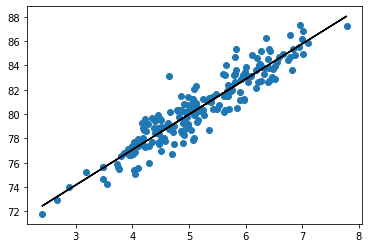

In [99]:
plt.scatter(x,y)
plt.plot(x,y_fit,'k-')

The slope and y-intercept are determined as the line that minimizes the squared vertical distance between the line and each point and then summed over all the points.

### R-Squared

The line does not perfectly represent y. If there is a strong linear relationship, it will represent it well. If not, it may represent it poorly.

The part of y, not represented by the line, is called the residual. You can calculate it as

$y_{res} = y_{fit}-y$

One way we quantify how well the regression line fits the data is to determine the amount of variation (or variance) in *y* can be explained by the dependence on *x* for that regression model. This is called $R^2$.  More formally, it is:

$ R^2=1-\frac{Unexplained Variance}{Total Variance} $

* Unexplained Variance is the variance of the residual $y$

* Total Variance is the variance of $y_{fit}$

* You can multiply by 100 and think of it as the % variance explained by the regression model

A larger $R^2$ indicates a better fit and means that the linear regression model (the best fit line) can explain well the variation of the output with different inputs.

In [100]:
y_res=y_fit-y
r_squared=1-(np.var(y_res)/np.var(y))
r_squared

0.8751788076725432

### We can fit a line to anything, but we shouldn't

In [101]:
y_rand=np.random.randn(len(x)) 
[m_fit_rand,b_fit_rand]=np.polyfit(x,y_rand,1)
y_fit_rand=m_fit_rand*x+b_fit_rand
print(b_fit_rand,m_fit_rand)

0.24156432191958016 -0.02963336978678159


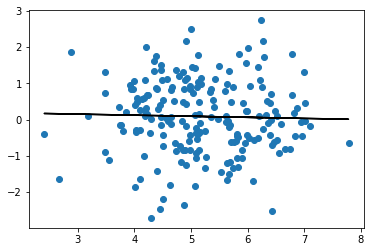

In [102]:
plt.scatter(x,y_rand)
plt.plot(x,y_fit_rand,'k-')

R-squared can give us an idea that this line isn't a very good fit to the data

In [103]:
y_res_rand=y_rand-y_fit_rand
r_squared_rand=1-(np.var(y_res_rand)/np.var(y_rand))
r_squared_rand

0.0007843455709147795

We may also want to do a significance test to slope is statistically different from zero.

This is not easily done using `np.polyfit`

### Using scipy

`scipy.stats.linregress`

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [104]:
from scipy.stats import linregress

In [105]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [106]:
slope,intercept,r_value,p_value, std_err

(2.902069640003515,
 65.46011193790702,
 0.9355099185324242,
 2.061797037203625e-91,
 0.07788808061823632)

r_value
: this is the correlation coefficient between the linear regression fit ($y_{fit}$) and the original data ($y$). Square this to get $r^2$.

p_value
:Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.

std_err
: the absolute measure of the typical distance that the data points fall from the regression line 

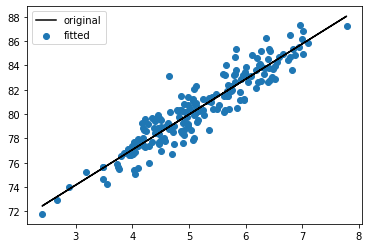

In [107]:
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'k')
plt.legend(['fitted','original'])

In [108]:
r_sq=r_value**2
r_sq

0.8751788076725429

In [109]:
p_value

2.061797037203625e-91

## Multiple Linear Regression 

y = $\beta$X + $\epsilon$

Where 

y = predictand/dependent variable

X = matrix of the predictor/independent variables, plus vector of one for the intercept term

$\epsilon$ is the error term

$\beta$ is the vector of regression coefficients associated with each independent variable and the intercept

The solution for the $\beta$ is 

$\beta$ = $( X^{T} X )^{-1}X^{T}y$

Here is a short video describing the geometric least squares solution https://www.youtube.com/watch?v=Z0wELiinNVQ 
*Note that the notation used in the video is different*

In [144]:
# From the beginning of this notebook recall that x is a vector of random numbers, m = 3 & b = 60
# Let's use this to generate a synthetic dataset with two independent variables
x1 = x
x2 = np.random.normal(5.0,1.0,200) # (mean, std. deviation, N)
m1 = m
m2 = 5
y = m1 * x1 + m2 * x2 + b + noise

In [169]:
# define matrix of independent variables (columns = each independent variable)
X = np.zeros((len(x2), 2)) # 2 independent variables x1 and x2
X[:,0] = x1
X[:,1] = x2

Text(0.5, 0, 'X2')

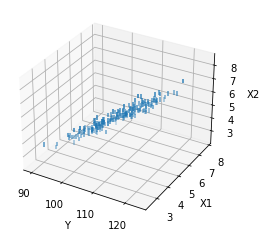

In [146]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(y, X[:,0], X[:,1], marker=m)
ax.set_xlabel('Y')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

Multiple Regression (Ordinary Least Squares Regression) calculation from
https://towardsdatascience.com/multiple-linear-regression-from-scratch-in-numpy-36a3e8ac8014 implemented with OOP

In [147]:
class OrdinaryLeastSquares(object):
    
    def __init__(self):
        self.coefficients = []
        
    def fit(self, X, y):
        if len(X.shape) == 1: X = self.__reshape_x(X)
            
        X = self._concatenate_ones(X)
        self.coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
        
    def predict(self, entry):
        b0 = self.coefficients[0]
        other_betas = self.coefficients[1:]
        predictions = b0
        
        for xi, bi in zip(entry, other_betas): predictions += (bi * xi)
        return predictions
        
    def _reshape_x(self, X):
        return X.reshape(-1, 1)
    
    def _concatenate_ones(self, X):
        ones = np.ones(shape=X.shape[0]).reshape(-1, 1)
        return np.concatenate((ones, X), 1)

In [148]:
model = OrdinaryLeastSquares()

In [149]:
model.fit(X, y)

In [150]:
model.coefficients

array([66.18351903,  2.91879968,  4.84191678])

In [171]:
b_est=model.coefficients[0]
print(b_est)
m1_est=model.coefficients[1]
print(m1_est)
m2_est=model.coefficients[2]
print(m2_est)

66.18351903023185
2.918799681556906
4.841916778938352


In [172]:
#model.predict(X[0])
y_preds = []
for row in X: y_preds.append(model.predict(row))

Text(0.5, 0, 'X2')

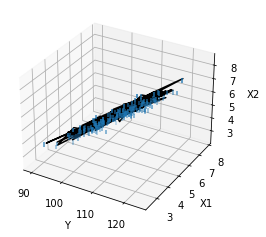

In [173]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(y, X[:,0], X[:,1], marker=m)
plt.plot(y_preds, X[:,0], X[:,1],'k')
ax.set_xlabel('Y')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

In [174]:
# Alternatively 
#y_fit = m1_est * X[:,0] + m2_est * X[:,1] + b_est
y_fit = m1_est * np.array(list(range(3, 8))) + m2_est * np.array(list(range(3, 8))) + b_est

Text(0.5, 0, 'X2')

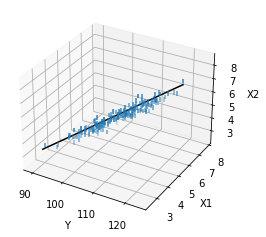

In [175]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(y, X[:,0], X[:,1], marker=m)
plt.plot(y_fit, np.array(list(range(3, 8))), np.array(list(range(3, 8))),'k')
ax.set_xlabel('Y')
ax.set_ylabel('x1')
ax.set_zlabel('x2')